In [37]:
# 04_descriptive_analysis.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned panel (from previous step)
panel = pd.read_csv("../data/cleaned/feature_engineered_panel.csv")

print("Shape:", panel.shape)
print("Columns:", panel.columns.tolist())

# ✅ Step 1: Quick overview
print("\n--- Panel Info ---")
print(panel.info())

print("\n--- Missing Values (%) ---")
print(panel.isna().mean().round(3) * 100)

print("\n--- Summary Stats ---")
print(panel.describe().T)

/var/folders/3p/l7x9nvb10398yg6vv8kxpstr0000gn/T/ipykernel_68124/1765549939.py:8: DtypeWarning: Columns (0,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  panel = pd.read_csv("../data/cleaned/feature_engineered_panel.csv")


Shape: (328890, 27)
Columns: ['fips', 'year', 'tot_clms', 'tot_opioid_clms', 'tot_prscrbrs', 'tot_opioid_prscrbrs', 'opioid_prscrbng_rate', 'state', 'county', 'pct_uninsured', 'pct_unemployed', 'pct_children_in_poverty', 'income_ratio', 'mental_health_provider_rate', 'primary_care_physicians_rate', 'pct_adults_reporting_currently_smoking', 'pct_adults_with_obesity', 'pct_excessive_drinking', 'pct_severe_housing_problems', 'injury_death_rate', 'opioid_claims_share', 'cost_per_claim', 'claims_per_1k', 'log1p_claims_per_1k', 'population', 'opioid_cost', 'opioid_cost_per_capita']

--- Panel Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328890 entries, 0 to 328889
Data columns (total 27 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   fips                                    328890 non-null  object 
 1   year                                    328890 non-null  int64  
 2   t

In [38]:
key_vars = ["opioid_claims_share","claims_per_1k",
            "opioid_prscrbng_rate","cost_per_claim"]

for col in key_vars:
    if col in panel.columns:
        print(f"\n--- {col} ---")
        print(panel[col].describe())


--- opioid_claims_share ---
count    308372.000000
mean          0.046182
std           0.052035
min           0.000000
25%           0.021036
50%           0.038942
75%           0.057284
max           1.000000
Name: opioid_claims_share, dtype: float64

--- claims_per_1k ---
count    110358.000000
mean        255.598815
std         816.203354
min           0.000000
25%           0.793945
50%         153.824836
75%         333.478573
max       43053.612953
Name: claims_per_1k, dtype: float64

--- opioid_prscrbng_rate ---
count    281846.000000
mean          5.052888
std           5.237242
min           0.000000
25%           2.660000
50%           4.170000
75%           5.940000
max         100.000000
Name: opioid_prscrbng_rate, dtype: float64

--- cost_per_claim ---
count    308372.000000
mean         84.639707
std         122.238826
min           0.000000
25%          19.785364
50%          55.583333
75%         108.457776
max        5202.999995
Name: cost_per_claim, dtype: float64


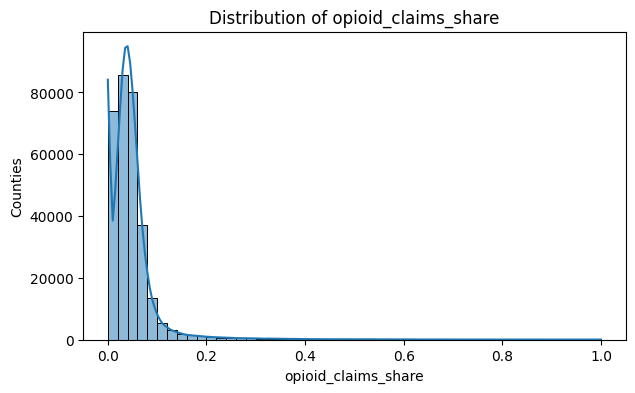

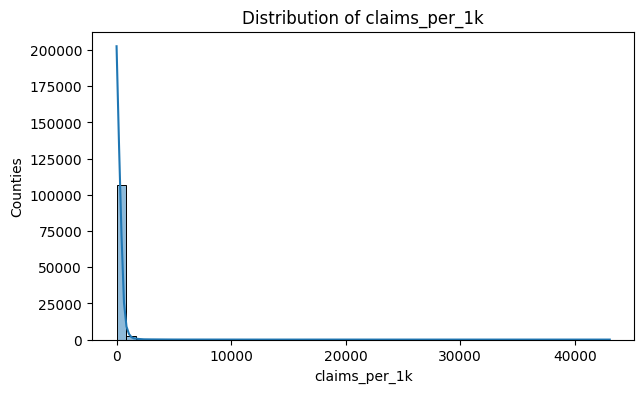

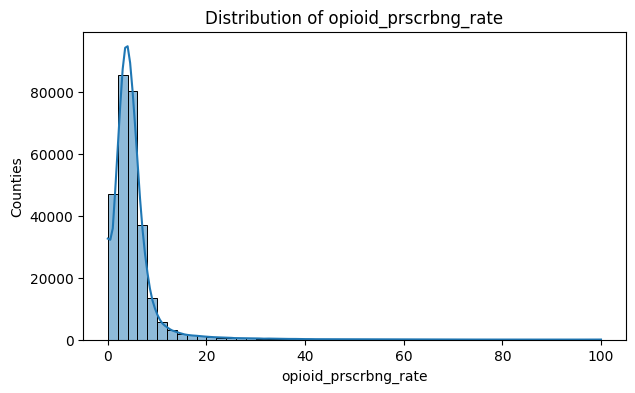

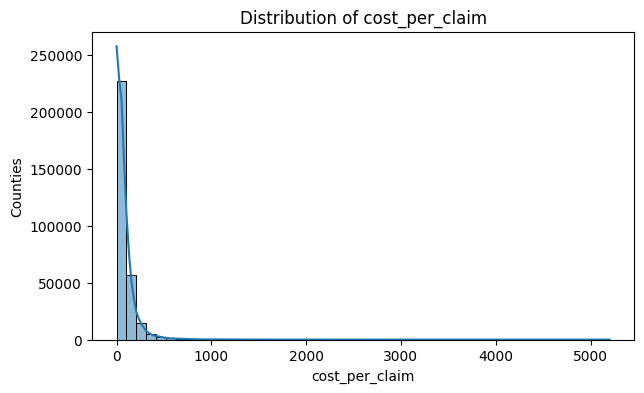

In [39]:
for col in key_vars:
    if col in panel.columns:
        plt.figure(figsize=(7,4))
        sns.histplot(panel[col].dropna(), bins=50, kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Counties")
        plt.show()

In [40]:
# State-level average opioid prescribing rate
state_summary = panel.groupby("state")["opioid_prscrbng_rate"].mean().sort_values(ascending=False)
print(state_summary.head(10))

state
Nevada        7.273144
Utah          7.193778
Alaska        6.299130
Washington    6.217605
New Mexico    6.212326
Colorado      5.955632
Alabama       5.905035
California    5.884751
Idaho         5.831019
Oregon        5.827689
Name: opioid_prscrbng_rate, dtype: float64


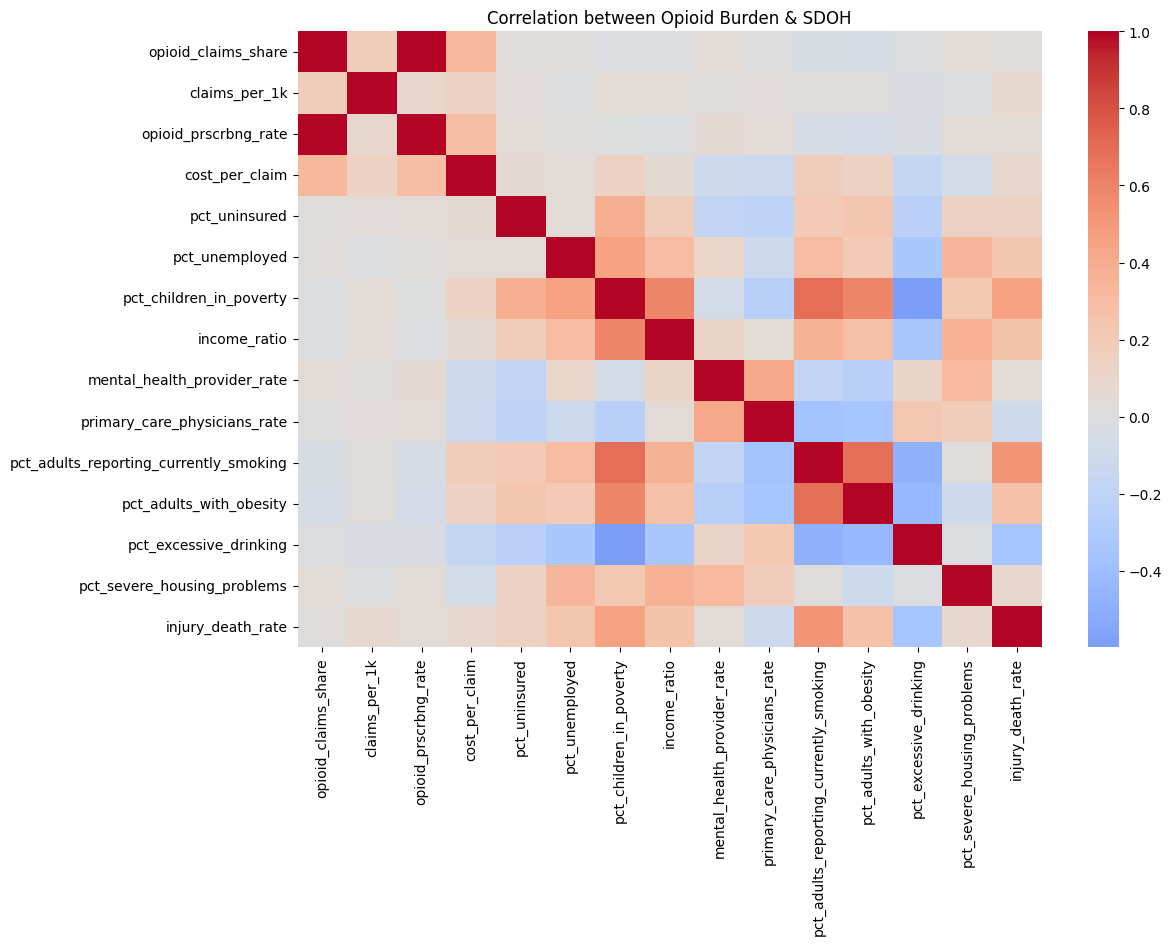

In [41]:
sdh_vars = [
    "pct_uninsured","pct_unemployed","pct_children_in_poverty","income_ratio",
    "mental_health_provider_rate","primary_care_physicians_rate",
    "pct_adults_reporting_currently_smoking","pct_adults_with_obesity",
    "pct_excessive_drinking","pct_severe_housing_problems","injury_death_rate"
]

corr_df = panel[key_vars + sdh_vars].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_df, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation between Opioid Burden & SDOH")
plt.show()

In [42]:
# Split by opioid_claims_share median
threshold = panel["opioid_claims_share"].median()
high_burden = panel[panel["opioid_claims_share"] > threshold]
low_burden  = panel[panel["opioid_claims_share"] <= threshold]

print("High burden mean SDOH:")
print(high_burden[sdh_vars].mean())

print("\nLow burden mean SDOH:")
print(low_burden[sdh_vars].mean())

High burden mean SDOH:
pct_uninsured                              11.546271
pct_unemployed                              3.624196
pct_children_in_poverty                    19.166507
income_ratio                                4.537364
mental_health_provider_rate               215.960359
primary_care_physicians_rate               56.017342
pct_adults_reporting_currently_smoking     18.854946
pct_adults_with_obesity                    37.048577
pct_excessive_drinking                     16.873701
pct_severe_housing_problems                13.111603
injury_death_rate                          96.675900
dtype: float64

Low burden mean SDOH:
pct_uninsured                              11.477604
pct_unemployed                              3.581079
pct_children_in_poverty                    19.526478
income_ratio                                4.564446
mental_health_provider_rate               186.985631
primary_care_physicians_rate               52.645657
pct_adults_reporting_currently_smoking

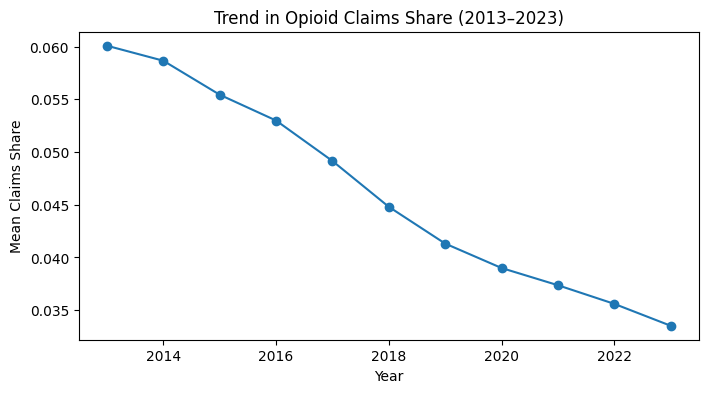

In [43]:
if "year" in panel.columns:
    yearly = panel.groupby("year")["opioid_claims_share"].mean()
    plt.figure(figsize=(8,4))
    plt.plot(yearly.index, yearly.values, marker="o")
    plt.title("Trend in Opioid Claims Share (2013–2023)")
    plt.xlabel("Year")
    plt.ylabel("Mean Claims Share")
    plt.show()

In [44]:
print(panel[["opioid_prscrbng_rate","injury_death_rate","claims_per_1k"]].describe())

       opioid_prscrbng_rate  injury_death_rate  claims_per_1k
count         281846.000000      110140.000000  110358.000000
mean               5.052888          96.004769     255.598815
std                5.237242          28.353643     816.203354
min                0.000000          29.515939       0.000000
25%                2.660000          76.678588       0.793945
50%                4.170000          93.524393     153.824836
75%                5.940000         110.990918     333.478573
max              100.000000         315.568022   43053.612953


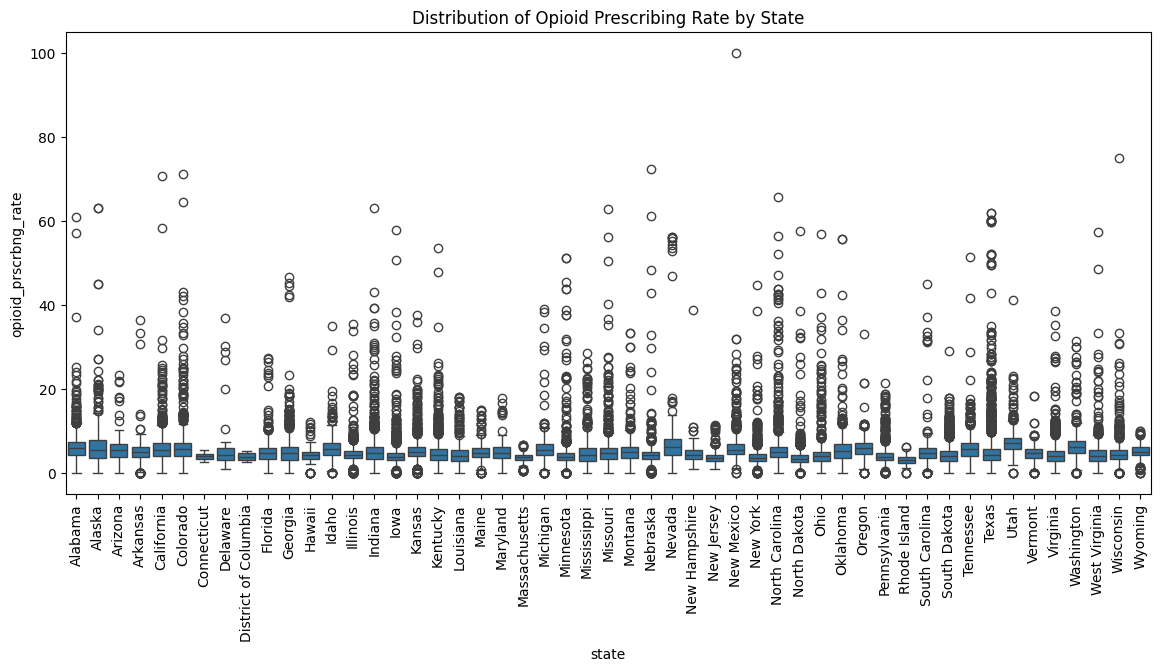

In [45]:
plt.figure(figsize=(14,6))
sns.boxplot(data=panel, x="state", y="opioid_prscrbng_rate")
plt.xticks(rotation=90)
plt.title("Distribution of Opioid Prescribing Rate by State")
plt.show()

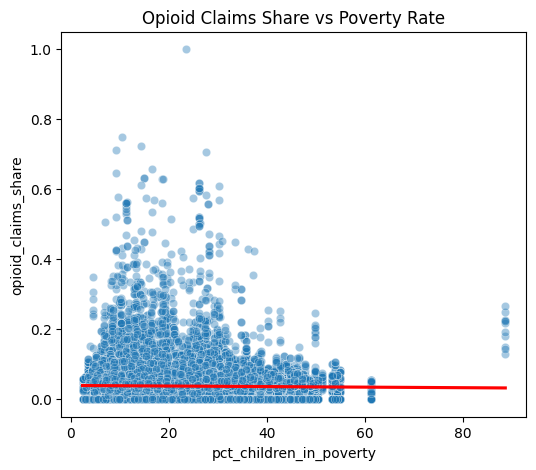

In [46]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=panel, x="pct_children_in_poverty", y="opioid_claims_share", alpha=0.4)
sns.regplot(data=panel, x="pct_children_in_poverty", y="opioid_claims_share",
            scatter=False, color="red")
plt.title("Opioid Claims Share vs Poverty Rate")
plt.show()

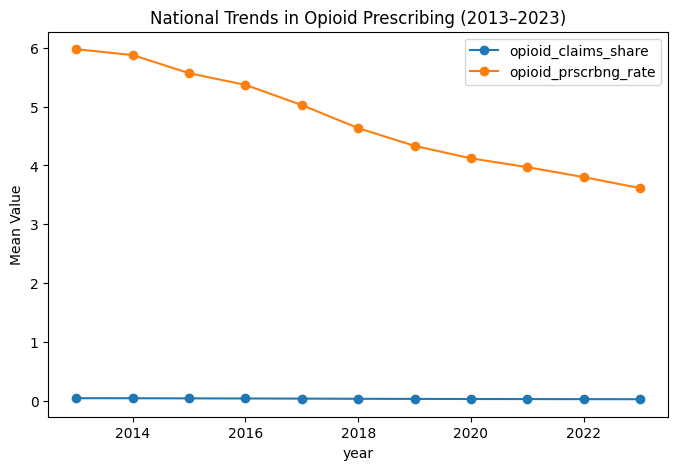

In [31]:
if "year" in panel.columns:
    yearly = panel.groupby("year")[["opioid_claims_share","opioid_prscrbng_rate"]].mean()
    yearly.plot(marker="o", figsize=(8,5))
    plt.title("National Trends in Opioid Prescribing (2013–2023)")
    plt.ylabel("Mean Value")
    plt.show()


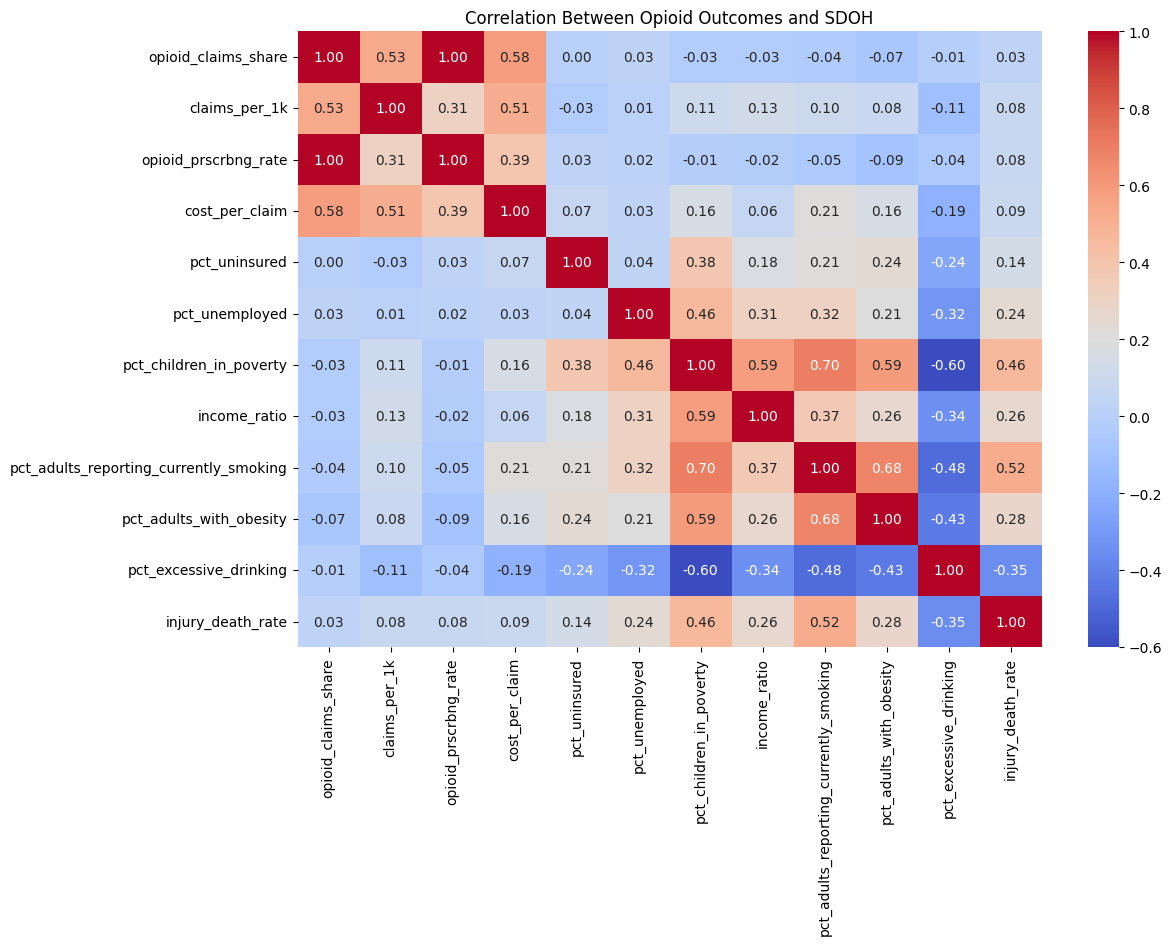

In [32]:
focus_vars = ["opioid_claims_share","claims_per_1k","opioid_prscrbng_rate","cost_per_claim",
              "pct_uninsured","pct_unemployed","pct_children_in_poverty","income_ratio",
              "pct_adults_reporting_currently_smoking","pct_adults_with_obesity",
              "pct_excessive_drinking","injury_death_rate"]

plt.figure(figsize=(12,8))
sns.heatmap(panel[focus_vars].corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Between Opioid Outcomes and SDOH")
plt.show()

In [50]:
!pip3 install geopandas

  Using cached geopandas-1.1.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached pyogrio-0.11.1-cp313-cp313-macosx_12_0_arm64.whl.metadata (5.3 kB)
  Using cached pyproj-3.7.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (31 kB)
Using cached geopandas-1.1.1-py3-none-any.whl (338 kB)
Using cached pyogrio-0.11.1-cp313-cp313-macosx_12_0_arm64.whl (19.4 MB)
Using cached pyproj-3.7.2-cp313-cp313-macosx_14_0_arm64.whl (4.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip


In [47]:
import scipy.stats as stats

threshold = panel["pct_children_in_poverty"].median()
high_poverty = panel[panel["pct_children_in_poverty"] > threshold]["opioid_claims_share"].dropna()
low_poverty = panel[panel["pct_children_in_poverty"] <= threshold]["opioid_claims_share"].dropna()

t_stat, p_val = stats.ttest_ind(high_poverty, low_poverty, equal_var=False)
print("t-statistic:", t_stat, "p-value:", p_val)


t-statistic: -1.9930763322429574 p-value: 0.046255549205361124


In [48]:
anova = stats.f_oneway(
    *[grp["opioid_prscrbng_rate"].dropna().values 
      for _, grp in panel.groupby("state")]
)
print("ANOVA F-statistic:", anova.statistic, "p-value:", anova.pvalue)

ANOVA F-statistic: 90.76043394363542 p-value: 0.0


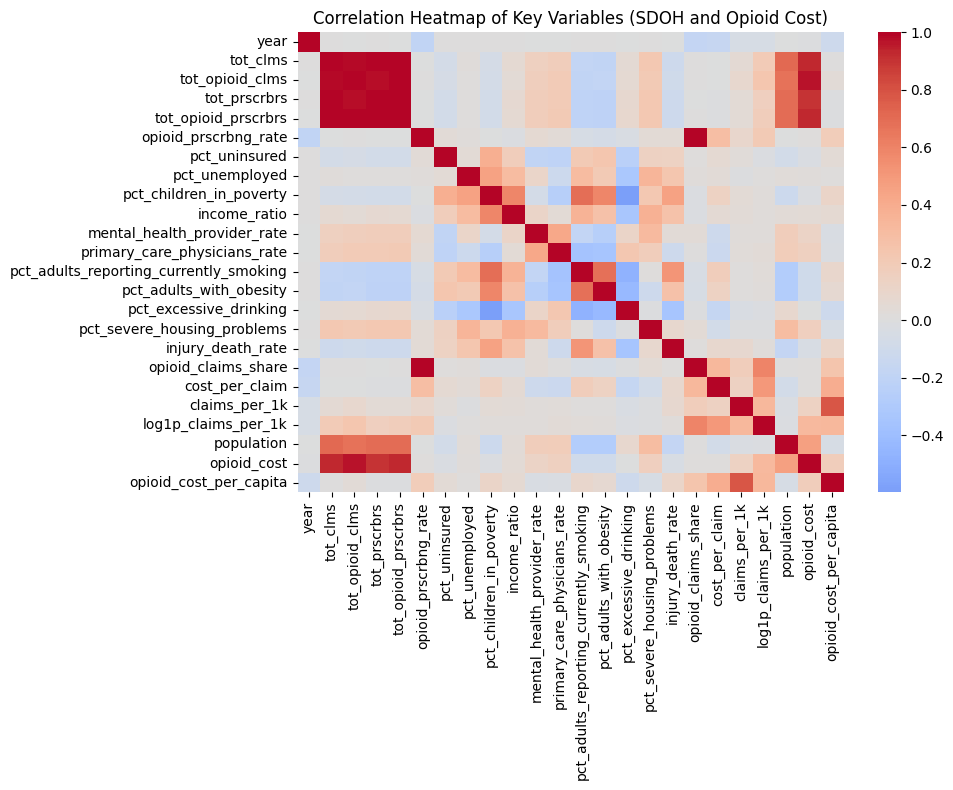

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
corr = panel.select_dtypes(include='number').corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Heatmap of Key Variables (SDOH and Opioid Cost)", fontsize=12)
plt.tight_layout()
plt.show()




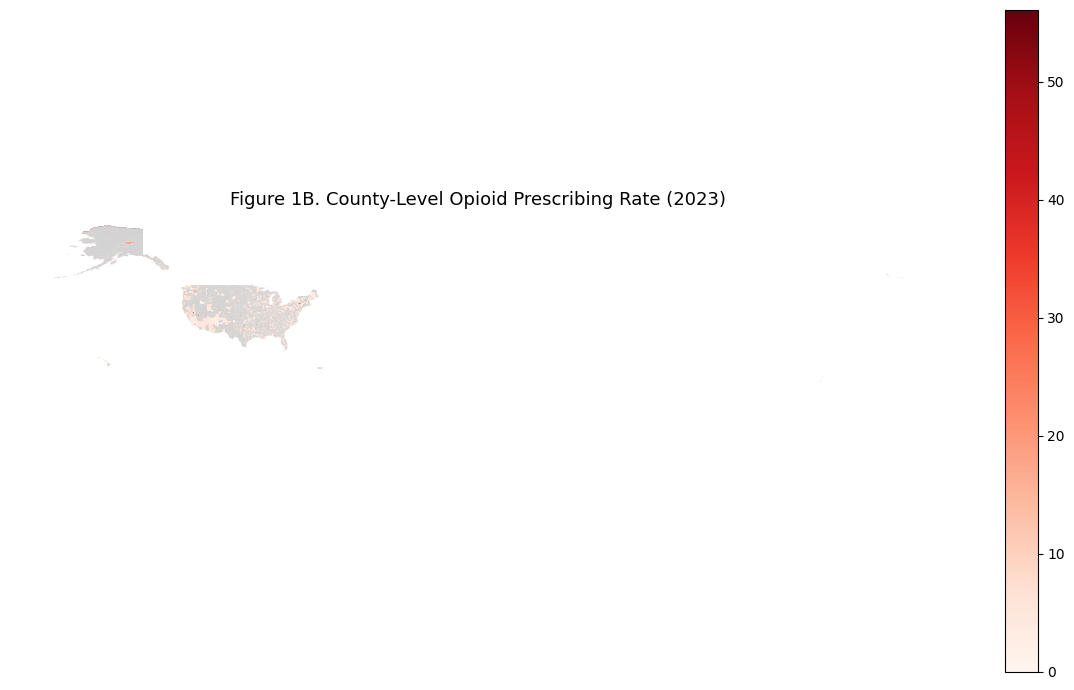

In [57]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load your 2023 panel data
panel_2023 = panel[panel["year"] == 2023].copy()

# Load U.S. county shapefile (downloaded once)
county_shp = gpd.read_file("../data/cleaned/cb_2018_us_county_5m.shp")

# Create FIPS code in shapefile
county_shp["fips"] = county_shp["STATEFP"] + county_shp["COUNTYFP"]

# Ensure your panel fips is 5-digit string
panel_2023["fips"] = panel_2023["fips"].astype(str).str.zfill(5)

# Merge geometry with opioid data
geo_merge = county_shp.merge(panel_2023, on="fips", how="left")

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
geo_merge.plot(
    column="opioid_prscrbng_rate",
    cmap="Reds",
    linewidth=0.1,
    legend=True,
    ax=ax,
    missing_kwds={"color": "lightgrey"}
)
ax.set_title("Figure 1B. County-Level Opioid Prescribing Rate (2023)", fontsize=13)
ax.axis("off")

plt.tight_layout()
plt.show()


In [59]:

# For the map, use the latest year available (2023)
map_df = panel[panel["year"] == 2023][["fips", "opioid_prscrbng_rate"]]


<Figure size 1400x800 with 0 Axes>

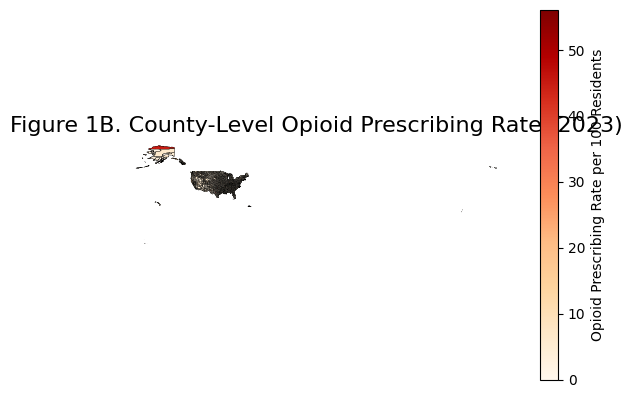

In [60]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load shapefile (adjust path)
county_map = gpd.read_file("../data/cleaned/cb_2018_us_county_5m.shp")
county_map["fips"] = county_map["STATEFP"] + county_map["COUNTYFP"]

# Merge
map_data = county_map.merge(map_df, on="fips", how="left")

# Plot
plt.figure(figsize=(14, 8))
map_data.plot(
    column="opioid_prscrbng_rate",
    cmap="OrRd",
    legend=True,
    edgecolor="black",
    linewidth=0.2,
    legend_kwds={'label': "Opioid Prescribing Rate per 100 Residents"}
)
plt.title("Figure 1B. County-Level Opioid Prescribing Rate (2023)", fontsize=16)
plt.axis("off")
plt.show()


In [61]:
county_fips = "21121"  # Knox County, KY
county_data = panel[panel["fips"] == county_fips]

display(county_data[[
    "year",
    "opioid_prscrbng_rate",
    "opioid_claims_share",
    "cost_per_claim",
    "pct_unemployed",
    "pct_children_in_poverty",
    "pct_adults_with_obesity",
    "mental_health_provider_rate"
]])

,year,opioid_prscrbng_rate,opioid_claims_share,cost_per_claim,pct_unemployed,pct_children_in_poverty,pct_adults_with_obesity,mental_health_provider_rate
1226,2023,3.76,0.037575,113.688889,5.317221,40.5,42.1,90.6314
4414,2023,3.76,0.037575,113.688889,5.317221,40.5,42.1,90.6314
7602,2023,NaN,0.000000,0.000000,5.317221,40.5,42.1,90.6314
32126,2022,4.07,0.040675,125.818182,5.317221,40.5,42.1,90.6314
35307,2022,4.07,0.040675,125.818182,5.317221,40.5,42.1,90.6314
38488,2022,NaN,0.000000,0.000000,5.317221,40.5,42.1,90.6314
62105,2021,4.25,0.042508,132.823529,5.317221,40.5,42.1,90.6314
65280,2021,4.25,0.042508,132.823529,5.317221,40.5,42.1,90.6314
68455,2021,NaN,0.000000,0.000000,5.317221,40.5,42.1,90.6314
91973,2020,4.34,0.043386,135.011765,5.317221,40.5,42.1,90.6314


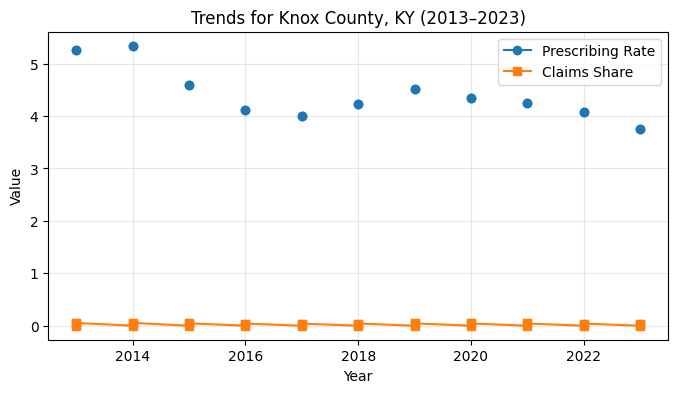

In [62]:
import matplotlib.pyplot as plt

county_data = panel[panel["fips"] == "21121"].sort_values("year")

plt.figure(figsize=(8,4))
plt.plot(county_data["year"], county_data["opioid_prscrbng_rate"], marker='o', label="Prescribing Rate")
plt.plot(county_data["year"], county_data["opioid_claims_share"], marker='s', label="Claims Share")
plt.title("Trends for Knox County, KY (2013–2023)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

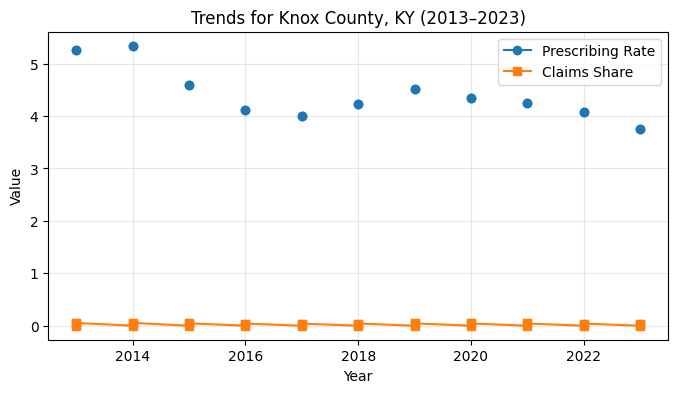

In [63]:
import matplotlib.pyplot as plt

county_data = panel[panel["fips"] == "21121"].sort_values("year")

plt.figure(figsize=(8,4))
plt.plot(county_data["year"], county_data["opioid_prscrbng_rate"], marker='o', label="Prescribing Rate")
plt.plot(county_data["year"], county_data["opioid_claims_share"], marker='s', label="Claims Share")
plt.title("Trends for Knox County, KY (2013–2023)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [64]:
panel["opioid_prscrbng_rate"].describe()

count    281846.000000
mean          5.052888
std           5.237242
min           0.000000
25%           2.660000
50%           4.170000
75%           5.940000
max         100.000000
Name: opioid_prscrbng_rate, dtype: float64

In [65]:
knox = panel[(panel["county"] == "Knox") & (panel["state"] == "KY")]

# Describe its prescribing rate
knox["opioid_prscrbng_rate"].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: opioid_prscrbng_rate, dtype: float64

In [66]:
knox = panel[(panel["county"].str.contains("Knox", case=False)) &
             (panel["state"] == "Kentucky")]

In [67]:
print(knox[["state","county"]].drop_duplicates())
print(knox["opioid_prscrbng_rate"].describe())

         state county
1226  Kentucky   Knox
count    22.000000
mean      4.408182
std       0.486852
min       3.760000
25%       4.082500
50%       4.250000
75%       4.580000
max       5.340000
Name: opioid_prscrbng_rate, dtype: float64


(33.0, 41.0)

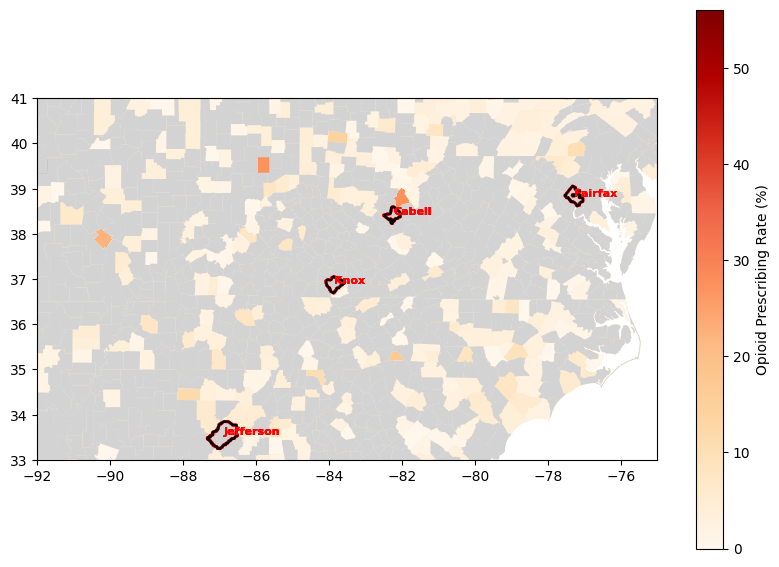

In [78]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Read or subset your panel for 2023 --------------------------
panel_2023 = panel[panel["year"] == 2023].copy()
panel_2023["fips"] = panel_2023["fips"].astype(str).str.zfill(5)
# --- 2. Load U.S. county shapefile (update path if needed) ----------
county_shp = gpd.read_file("../data/cleaned/cb_2018_us_county_5m.shp")
county_shp["fips"] = (
    county_shp["STATEFP"].astype(str).str.zfill(2)
    + county_shp["COUNTYFP"].astype(str).str.zfill(3)
)

# --- 3. Merge opioid prescribing data with shapefile ----------------
map_df = county_shp.merge(panel_2023, on="fips", how="left")
# --- 4. Clean county/state columns for safe string comparison -------
map_df["state"] = map_df["state"].astype(str).str.strip().str.lower()
map_df["county"] = map_df["county"].astype(str).str.strip().str.lower()
# --- 5. Define counties to highlight -------------------------------
highlight_counties = [
    ("jefferson", "alabama"),       # High-risk example
    ("cabell", "west virginia"),    # High-risk example
    ("knox", "kentucky"),           # Persistent-burden example
    ("fairfax", "virginia")         # Low-risk reference
]
# --- 6. Identify highlight rows safely ------------------------------
def is_highlight_row(row, targets):
    for c_name, s_name in targets:
        if row["county"] == c_name and row["state"] == s_name:
            return True
    return False

highlights = map_df[map_df.apply(is_highlight_row, targets=highlight_counties, axis=1)]

# --- 7. Optional: limit to SE US region for zoomed-in clarity -------
lon_min, lon_max = -92, -75
lat_min, lat_max = 33, 41

# --- 8. Plot map ----------------------------------------------------
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
map_df.plot(
    column="opioid_prscrbng_rate",
    cmap="OrRd",
    linewidth=0.1,
    ax=ax,
    legend=True,
    legend_kwds={"label": "Opioid Prescribing Rate (%)"},
    missing_kwds={"color": "lightgrey", "label": "No data"}
)

# Overlay highlighted counties
highlights.boundary.plot(ax=ax, color="black", linewidth=1.2)
highlights.plot(ax=ax, color="none", edgecolor="red", linewidth=2)

# Add labels
for idx, row in highlights.iterrows():
    x, y = row["geometry"].centroid.x, row["geometry"].centroid.y
    ax.text(x, y, row["county"].title(), fontsize=8, color="red", weight="bold")


# Set zoom window
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)

In [81]:
!pip3 install statsmodels

  Using cached statsmodels-0.14.5-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.5 kB)
Using cached statsmodels-0.14.5-cp313-cp313-macosx_11_0_arm64.whl (9.7 MB)

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip


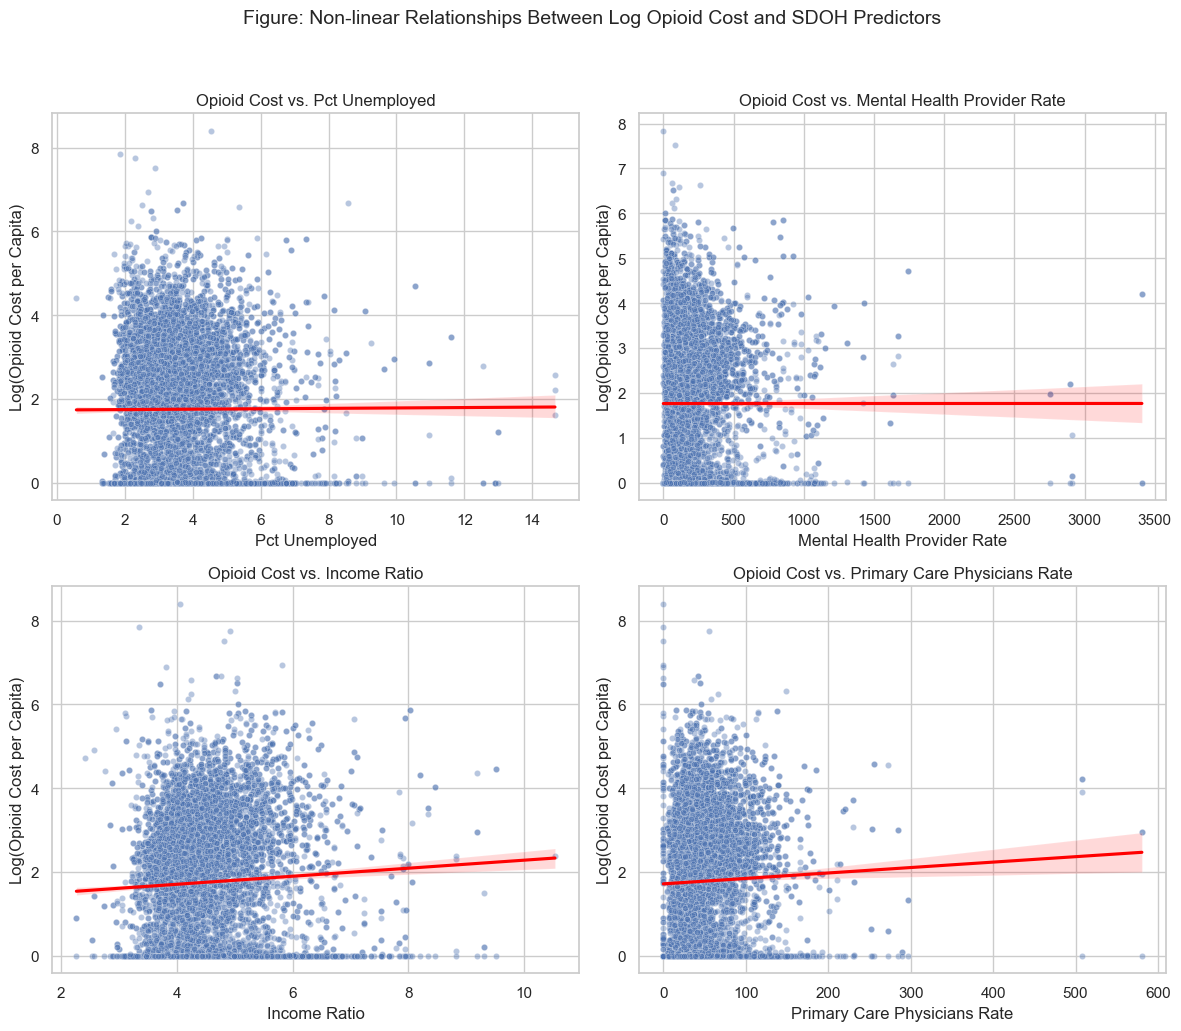

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Focus variables
predictors = [
    "pct_unemployed",
    "mental_health_provider_rate",
    "income_ratio",
    "primary_care_physicians_rate"
]

# Log-transform cost per capita to stabilize variance
panel["log1p_opioid_cost_per_capita"] = np.log1p(panel["opioid_cost_per_capita"])

# Set style
sns.set(style="whitegrid", context="notebook")

# Plot scatterplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, var in enumerate(predictors):
    sns.scatterplot(
        data=panel,
        x=var,
        y="log1p_opioid_cost_per_capita",
        alpha=0.4,
        s=20,
        ax=axes[i],
    )
    sns.regplot(
        data=panel,
        x=var,
        y="log1p_opioid_cost_per_capita",
        scatter=False,
        color="red",
        ax=axes[i]
    )
    axes[i].set_title(f"Opioid Cost vs. {var.replace('_', ' ').title()}")
    axes[i].set_xlabel(var.replace('_', ' ').title())
    axes[i].set_ylabel("Log(Opioid Cost per Capita)")

plt.suptitle("Figure: Non-linear Relationships Between Log Opioid Cost and SDOH Predictors", fontsize=14, y=1.03)
plt.tight_layout()
plt.show()


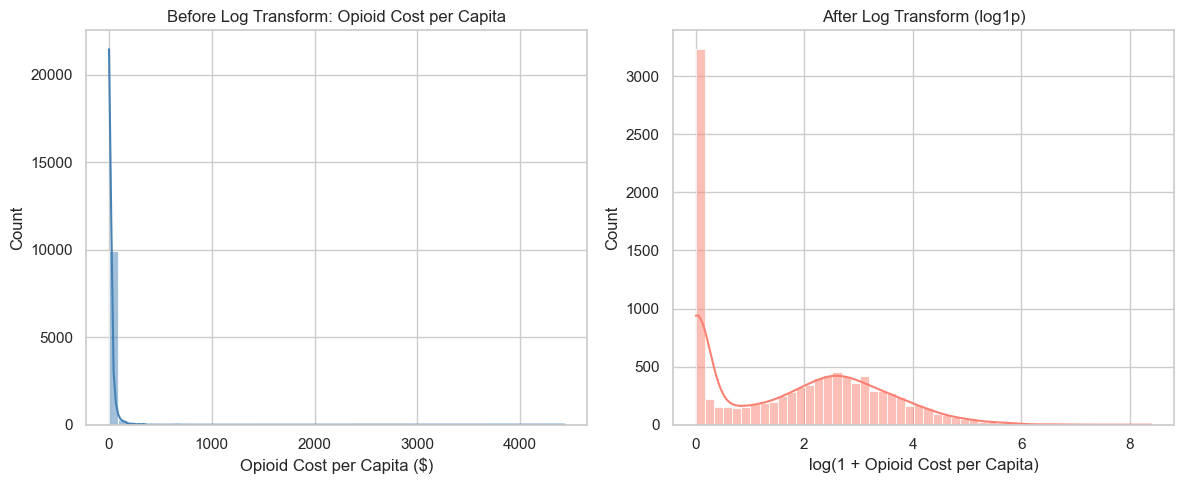

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12,5))

# Histogram before log transformation
plt.subplot(1,2,1)
sns.histplot(panel["opioid_cost_per_capita"].dropna(), bins=50, color="steelblue", kde=True)
plt.title("Before Log Transform: Opioid Cost per Capita")
plt.xlabel("Opioid Cost per Capita ($)")
plt.ylabel("Count")

# Histogram after log transformation
plt.subplot(1,2,2)
sns.histplot(np.log1p(panel["opioid_cost_per_capita"].dropna()), bins=50, color="salmon", kde=True)
plt.title("After Log Transform (log1p)")
plt.xlabel("log(1 + Opioid Cost per Capita)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


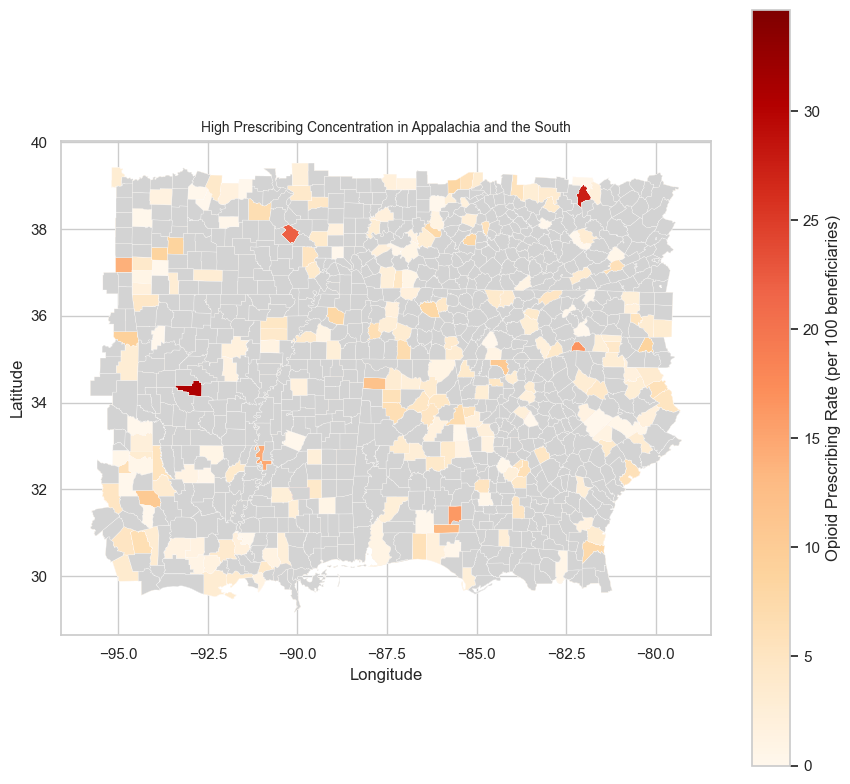

In [90]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Read or subset your panel for 2023 --------------------------
panel_2023 = panel[panel["year"] == 2023].copy()
panel_2023["fips"] = panel_2023["fips"].astype(str).str.zfill(5)
# --- 2. Load U.S. county shapefile (update path if needed) ----------
county_shp = gpd.read_file("../data/cleaned/cb_2018_us_county_5m.shp")
county_shp["fips"] = (
    county_shp["STATEFP"].astype(str).str.zfill(2)
    + county_shp["COUNTYFP"].astype(str).str.zfill(3)
)

# --- 3. Merge opioid prescribing data with shapefile ----------------
map_df = county_shp.merge(panel_2023, on="fips", how="left")
# --- 4. Clean county/state columns for safe string comparison -------
map_df["state"] = map_df["state"].astype(str).str.strip().str.lower()
map_df["county"] = map_df["county"].astype(str).str.strip().str.lower()
# --- 5. Define counties to highlight -------------------------------


geo = map_df.to_crs(epsg=4326)
bounds = (-95, 30, -80, 39)   # (minx, miny, maxx, maxy)
geo_clip = geo.cx[bounds[0]:bounds[2], bounds[1]:bounds[3]]

# --- Plot the zoomed map ---
fig, ax = plt.subplots(1, 1, figsize=(9, 8))
geo_clip.plot(
    column="opioid_prscrbng_rate",
    cmap="OrRd",
    linewidth=0.2,
    ax=ax,
    legend=True,
    missing_kwds={"color": "lightgrey"},
    legend_kwds={
        'label': "Opioid Prescribing Rate (per 100 beneficiaries)",
        'orientation': "vertical"
    }
)
ax.set_title("High Prescribing Concentration in Appalachia and the South", fontsize=10)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()